# Import packages and modules

In [40]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import lifelines
import patsy
from sklearn import linear_model, metrics, model_selection

# plot style
sns.set(style = "darkgrid", context = "notebook", palette = "colorblind", font_scale = 1.5)

# Data

## Presidential Cabinet Nominations
Downloaded from [Kaggle - Presidential Cabinet Nominations: Senate confirmation vote records for cabinet nominees since 1976](https://www.kaggle.com/senate/confirmation-votes) and modified with [Donald J. Trump Cabinet Nominations](https://www.senate.gov/legislative/nominations/Trump_cabinet.htm)

In [41]:
presidential_cabinet_nominations = pd.read_csv("presidential_cabinet_nominations.csv")

# sample it
presidential_cabinet_nominations.sample(n = 10, replace = False)

,position,president,president_party,nominee,announced_date,received_date,withdrawn_date,confirmed_date,rejected_date,vote_type,votes_for,votes_against
186,Secretary of the Treasury,Donald J. Trump,Republican,Steve Mnuchin,11/30/16,1/20/17,NaN,2/13/17,NaN,NaN,53.0,47.0
11,Secretary of Energy,Jimmy Carter,Democrat,James Schlesinger,8/4/77,8/4/77,NaN,8/4/77,NaN,Voice Vote,NaN,NaN
151,Secretary of Veterans Affairs,Barack Obama,Democrat,Eric Shinseki,12/7/08,1/20/09,NaN,1/20/09,NaN,Voice Vote,NaN,NaN
187,Secretary of Housing & Urban Development,Donald J. Trump,Republican,Ben Carson,12/5/16,1/20/17,NaN,3/2/17,NaN,NaN,58.0,41.0
56,Secretary of the Treasury,George H.W. Bush,Republican,Nicholas Brady,11/15/88,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,Secretary of the Treasury,George W. Bush,Republican,Henry Paulson,5/30/06,6/19/06,NaN,6/28/06,NaN,Voice Vote,NaN,NaN
51,Secretary of Defense,Ronald Reagan,Republican,Frank Carlucci,11/5/87,11/5/87,NaN,11/20/87,NaN,Roll Call Vote,91.0,1.0
68,Secretary of Energy,George H.W. Bush,Republican,James Watkins,1/12/89,1/20/89,NaN,3/1/89,NaN,Roll Call Vote,99.0,0.0
143,Secretary of Agriculture,George W. Bush,Republican,Edward Schafer,10/31/07,12/6/07,NaN,1/28/08,NaN,Voice Vote,NaN,NaN
145,Secretary of the Treasury,Barack Obama,Democrat,Timothy Geithner,11/24/08,1/20/09,NaN,1/26/09,NaN,Roll Call Vote,60.0,34.0


In [42]:
presidential_cabinet_nominations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   position         211 non-null    object 
 1   president        211 non-null    object 
 2   president_party  211 non-null    object 
 3   nominee          211 non-null    object 
 4   announced_date   211 non-null    object 
 5   received_date    200 non-null    object 
 6   withdrawn_date   11 non-null     object 
 7   confirmed_date   190 non-null    object 
 8   rejected_date    1 non-null      object 
 9   vote_type        166 non-null    object 
 10  votes_for        141 non-null    float64
 11  votes_against    141 non-null    float64
dtypes: float64(2), object(10)
memory usage: 19.9+ KB


## Biden Cabinet Nominations

In [43]:
biden_cabinet_nominations = pd.read_csv("biden_cabinet_nominations.csv")

# to date time
biden_cabinet_nominations["announced_datetime"] = pd.to_datetime(biden_cabinet_nominations["announced_date"])

biden_cabinet_nominations["announced_year"] = biden_cabinet_nominations["announced_datetime"].dt.year

biden_cabinet_nominations

,position,president,nominee,announced_date,announced_datetime,announced_year
0,Secretary of Homeland Security,Joseph R. Biden,Alejandro Mayorkas,11/23/20,2020-11-23,2020
1,Secretary of State,Joseph R. Biden,Antony Blinken,11/23/20,2020-11-23,2020
2,Secretary of the Interior,Joseph R. Biden,Deb Haaland,12/17/20,2020-12-17,2020
3,Secretary of Veterans Affairs,Joseph R. Biden,Denis McDonough,12/10/20,2020-12-10,2020
4,Secretary of Defense,Joseph R. Biden,Gen. Lloyd Austin,12/8/20,2020-12-08,2020
5,Secretary of Commerce,Joseph R. Biden,Gina Raimondo,1/7/21,2021-01-07,2021
6,Secretary of the Treasury,Joseph R. Biden,Janet Yellen,11/30/20,2020-11-30,2020
7,Secretary of Energy,Joseph R. Biden,Jennifer Granholm,12/17/20,2020-12-17,2020
8,Secretary of Housing & Urban Development,Joseph R. Biden,Marcia Fudge,12/10/20,2020-12-10,2020
9,Secretary of Labor,Joseph R. Biden,Marty Walsh,1/7/21,2021-01-07,2021


## Modify dates

In [44]:
# date times
presidential_cabinet_nominations["announced_datetime"] = pd.to_datetime(presidential_cabinet_nominations["announced_date"])

presidential_cabinet_nominations["received_datetime"] = pd.to_datetime(presidential_cabinet_nominations["received_date"])

presidential_cabinet_nominations["withdrawn_datetime"] = pd.to_datetime(presidential_cabinet_nominations["withdrawn_date"])

presidential_cabinet_nominations["confirmed_datetime"] = pd.to_datetime(presidential_cabinet_nominations["confirmed_date"])

presidential_cabinet_nominations["announced_year"] = presidential_cabinet_nominations["announced_datetime"].dt.year

presidential_cabinet_nominations["confirmed_year"] = presidential_cabinet_nominations["confirmed_datetime"].dt.year

In [45]:
presidential_cabinet_nominations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   position            211 non-null    object        
 1   president           211 non-null    object        
 2   president_party     211 non-null    object        
 3   nominee             211 non-null    object        
 4   announced_date      211 non-null    object        
 5   received_date       200 non-null    object        
 6   withdrawn_date      11 non-null     object        
 7   confirmed_date      190 non-null    object        
 8   rejected_date       1 non-null      object        
 9   vote_type           166 non-null    object        
 10  votes_for           141 non-null    float64       
 11  votes_against       141 non-null    float64       
 12  announced_datetime  211 non-null    datetime64[ns]
 13  received_datetime   200 non-null    datetime64[ns]

## Life times

In [46]:
presidential_cabinet_nominations["announced_confirmed_days"] = (presidential_cabinet_nominations["confirmed_datetime"] - presidential_cabinet_nominations["announced_datetime"]).dt.days

presidential_cabinet_nominations["received_confirmed_days"] = (presidential_cabinet_nominations["confirmed_datetime"] - presidential_cabinet_nominations["received_datetime"]).dt.days

## Vote variables

In [47]:
presidential_cabinet_nominations["n_votes"] = presidential_cabinet_nominations["votes_for"] + presidential_cabinet_nominations["votes_against"]

presidential_cabinet_nominations["votes_for_ppt"] = presidential_cabinet_nominations["votes_for"] / presidential_cabinet_nominations["n_votes"]

# sample it
presidential_cabinet_nominations.sample(n = 10, replace = False)

,position,president,president_party,nominee,announced_date,received_date,withdrawn_date,confirmed_date,rejected_date,vote_type,...,announced_datetime,received_datetime,withdrawn_datetime,confirmed_datetime,announced_year,confirmed_year,announced_confirmed_days,received_confirmed_days,n_votes,votes_for_ppt
154,Secretary of Housing & Urban Development,Barack Obama,Democrat,Shaun Donovan,12/13/08,1/20/09,NaN,1/22/09,NaN,Voice Vote,...,2008-12-13,2009-01-20,NaT,2009-01-22,2008,2009.0,40.0,2.0,NaN,NaN
134,Secretary of Energy,George W. Bush,Republican,Sam Bodman,12/10/04,1/4/05,NaN,1/31/05,NaN,Voice Vote,...,2004-12-10,2005-01-04,NaT,2005-01-31,2004,2005.0,52.0,27.0,NaN,NaN
150,Secretary of Commerce,Barack Obama,Democrat,Bill Richardson,12/3/08,NaN,1/4/09,NaN,NaN,NaN,...,2008-12-03,NaT,2009-01-04,NaT,2008,NaN,NaN,NaN,NaN,NaN
80,Secretary of Housing & Urban Development,Bill Clinton,Democrat,Henry Cisneros,12/17/92,1/20/93,NaN,1/21/93,NaN,Unanimous Consent,...,1992-12-17,1993-01-20,NaT,1993-01-21,1992,1993.0,35.0,1.0,100.0,1.000000
53,Secretary of the Treasury,Ronald Reagan,Republican,Nicholas Brady,8/5/88,8/10/88,NaN,9/14/88,NaN,Roll Call Vote,...,1988-08-05,1988-08-10,NaT,1988-09-14,1988,1988.0,40.0,35.0,94.0,0.978723
76,Secretary of State,George H.W. Bush,Republican,Lawrence Eagleburger,12/8/92,NaN,NaN,NaN,NaN,NaN,...,1992-12-08,NaT,NaT,NaT,1992,NaN,NaN,NaN,NaN,NaN
131,Secretary of Agriculture,George W. Bush,Republican,Mike Johanns,12/2/04,1/4/05,NaN,1/20/05,NaN,Voice Vote,...,2004-12-02,2005-01-04,NaT,2005-01-20,2004,2005.0,49.0,16.0,NaN,NaN
41,Secretary of the Treasury,Ronald Reagan,Republican,James Baker III,1/8/85,1/18/85,NaN,1/29/85,NaN,Roll Call Vote,...,1985-01-08,1985-01-18,NaT,1985-01-29,1985,1985.0,21.0,11.0,95.0,1.000000
188,Secretary of Defense,Donald J. Trump,Republican,James Mattis,12/6/16,1/20/17,NaN,1/20/17,NaN,NaN,...,2016-12-06,2017-01-20,NaT,2017-01-20,2016,2017.0,45.0,0.0,99.0,0.989899
7,Secretary of Defense,Jimmy Carter,Democrat,Harold Brown,12/21/76,1/20/77,NaN,1/20/77,NaN,Voice Vote,...,1976-12-21,1977-01-20,NaT,1977-01-20,1976,1977.0,30.0,0.0,NaN,NaN


## Flag whether nominee is first nominee for president

In [48]:
presidential_cabinet_nominations["first_pick"] = (presidential_cabinet_nominations["announced_datetime"] == presidential_cabinet_nominations.groupby(["president", "position"])["announced_datetime"].transform(min)).astype(float).replace({0: -0.5, 1: 0.5})

## President Political Party predictor

In [49]:
presidential_cabinet_nominations["democratic_president"] = presidential_cabinet_nominations["president_party"].replace({"Republican": -0.5, "Democrat": 0.5})

## Subset only announcement and confirmation

In [50]:
nominee_announced_confirmed = presidential_cabinet_nominations.loc[:, ["position", "president", "democratic_president", "nominee", "first_pick", "announced_datetime", "confirmed_datetime", "announced_year", "confirmed_year", "announced_confirmed_days", "votes_for", "votes_against", "n_votes", "votes_for_ppt"]].dropna().drop_duplicates()

nominee_announced_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 4 to 210
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   position                  138 non-null    object        
 1   president                 138 non-null    object        
 2   democratic_president      138 non-null    float64       
 3   nominee                   138 non-null    object        
 4   first_pick                138 non-null    float64       
 5   announced_datetime        138 non-null    datetime64[ns]
 6   confirmed_datetime        138 non-null    datetime64[ns]
 7   announced_year            138 non-null    int64         
 8   confirmed_year            138 non-null    float64       
 9   announced_confirmed_days  138 non-null    float64       
 10  votes_for                 138 non-null    float64       
 11  votes_against             138 non-null    float64       
 12  n_votes               

# Descriptives

In [51]:
nominee_announced_confirmed["announced_confirmed_days"].describe()

count    138.000000
mean      50.985507
std       38.635294
min        7.000000
25%       32.000000
50%       42.000000
75%       62.000000
max      397.000000
Name: announced_confirmed_days, dtype: float64

In [52]:
nominee_announced_confirmed.groupby("position")["announced_confirmed_days"].describe().sort_values("50%")

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
Secretary of Education,7.0,36.285714,19.250232,15.0,29.00,31.0,37.00,76.0
Secretary of Veterans Affairs,6.0,43.000000,19.707866,25.0,30.00,34.0,58.25,70.0
Secretary of the Interior,9.0,44.555556,18.682285,27.0,31.00,36.0,63.00,76.0
Secretary of Energy,10.0,46.100000,24.043710,11.0,31.50,39.0,66.75,82.0
Secretary of Defense,11.0,36.181818,19.717090,7.0,21.50,40.0,49.00,69.0
Secretary of Agriculture,7.0,54.000000,28.501462,28.0,33.00,41.0,74.00,95.0
Secretary of Transportation,11.0,42.545455,14.313376,22.0,29.00,42.0,54.50,63.0
Secretary of Housing & Urban Development,8.0,45.750000,17.766341,31.0,34.75,42.5,47.00,87.0
Secretary of the Treasury,10.0,43.900000,18.174769,14.0,36.25,44.5,51.50,75.0


# Plots

## Secretary of Housing & Urban Development Announced-Confirm lifetime

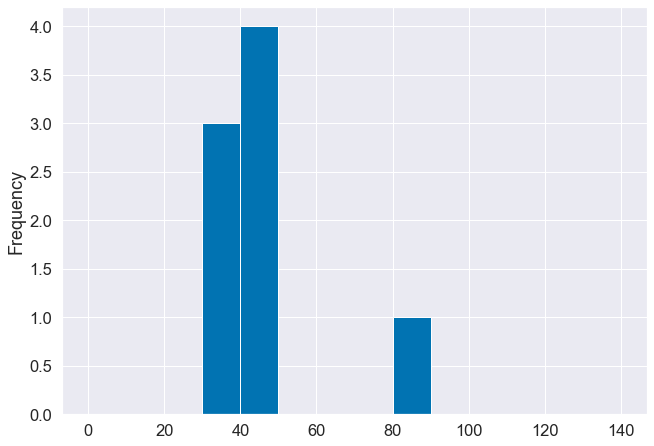

In [53]:
nominee_announced_confirmed.query("position == 'Secretary of Housing & Urban Development'")["announced_confirmed_days"].plot(kind = "hist", bins = np.arange(0, 150, 10), edgecolor = "white", figsize = (10.5, 7.5));

## Secretary of Housing & Urban Development Announced-Confirm lifetime over time

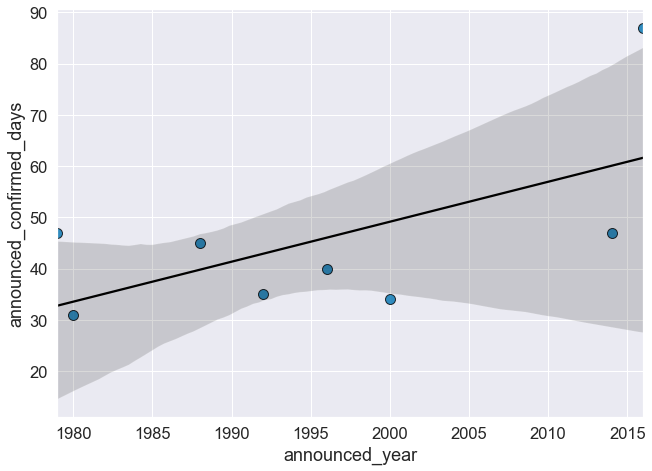

In [54]:
fig, axes = plt.subplots(figsize = (10.5, 7.5))

sns.regplot(x = "announced_year", y = "announced_confirmed_days", data = nominee_announced_confirmed.query("position == 'Secretary of Housing & Urban Development'"), scatter_kws = {"s": 100, "edgecolor": "black"}, lowess = False, line_kws = {"color": "black"}, ax = axes)

## All secretaries announced-confirmed days by year

## Secretary of of the Interior Announced-Confirm lifetime over time

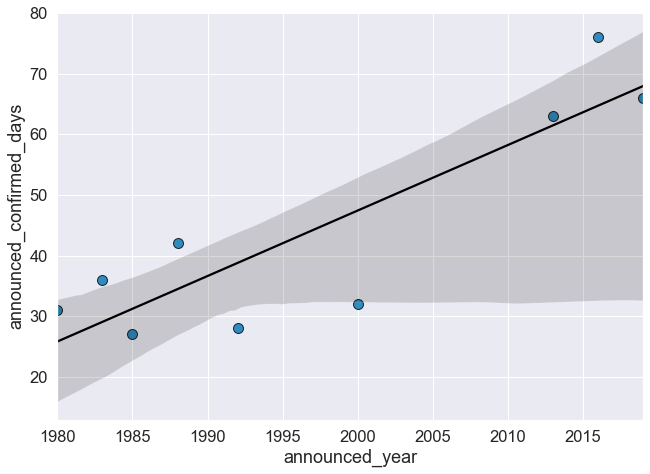

In [55]:
fig, axes = plt.subplots(figsize = (10.5, 7.5))

sns.regplot(x = "announced_year", y = "announced_confirmed_days", data = nominee_announced_confirmed.query("position == 'Secretary of the Interior'"), scatter_kws = {"s": 100, "edgecolor": "black"}, lowess = False, line_kws = {"color": "black"}, ax = axes);

## Secretary of Labor Announced-Confirm lifetime over time

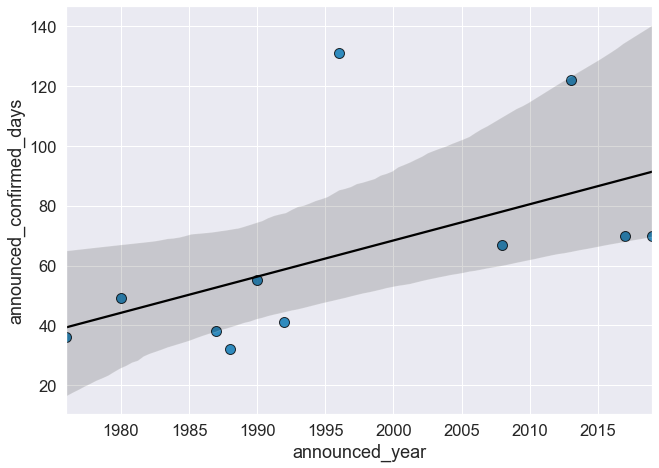

In [56]:
fig, axes = plt.subplots(figsize = (10.5, 7.5))

sns.regplot(x = "announced_year", y = "announced_confirmed_days", data = nominee_announced_confirmed.query("position == 'Secretary of Labor'"), scatter_kws = {"s": 100, "edgecolor": "black"}, lowess = False, line_kws = {"color": "black"}, ax = axes);

## Attorney General Announced-Confirm lifetime over time

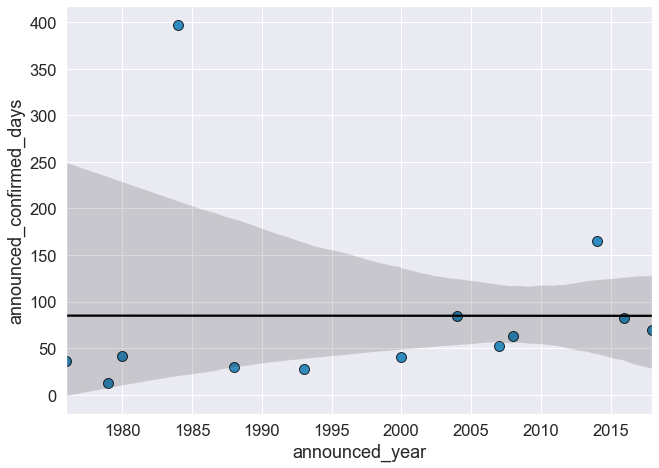

In [57]:
fig, axes = plt.subplots(figsize = (10.5, 7.5))

sns.regplot(x = "announced_year", y = "announced_confirmed_days", data = nominee_announced_confirmed.query("position == 'Attorney General'"), scatter_kws = {"s": 100, "edgecolor": "black"}, lowess = False, line_kws = {"color": "black"}, ax = axes);

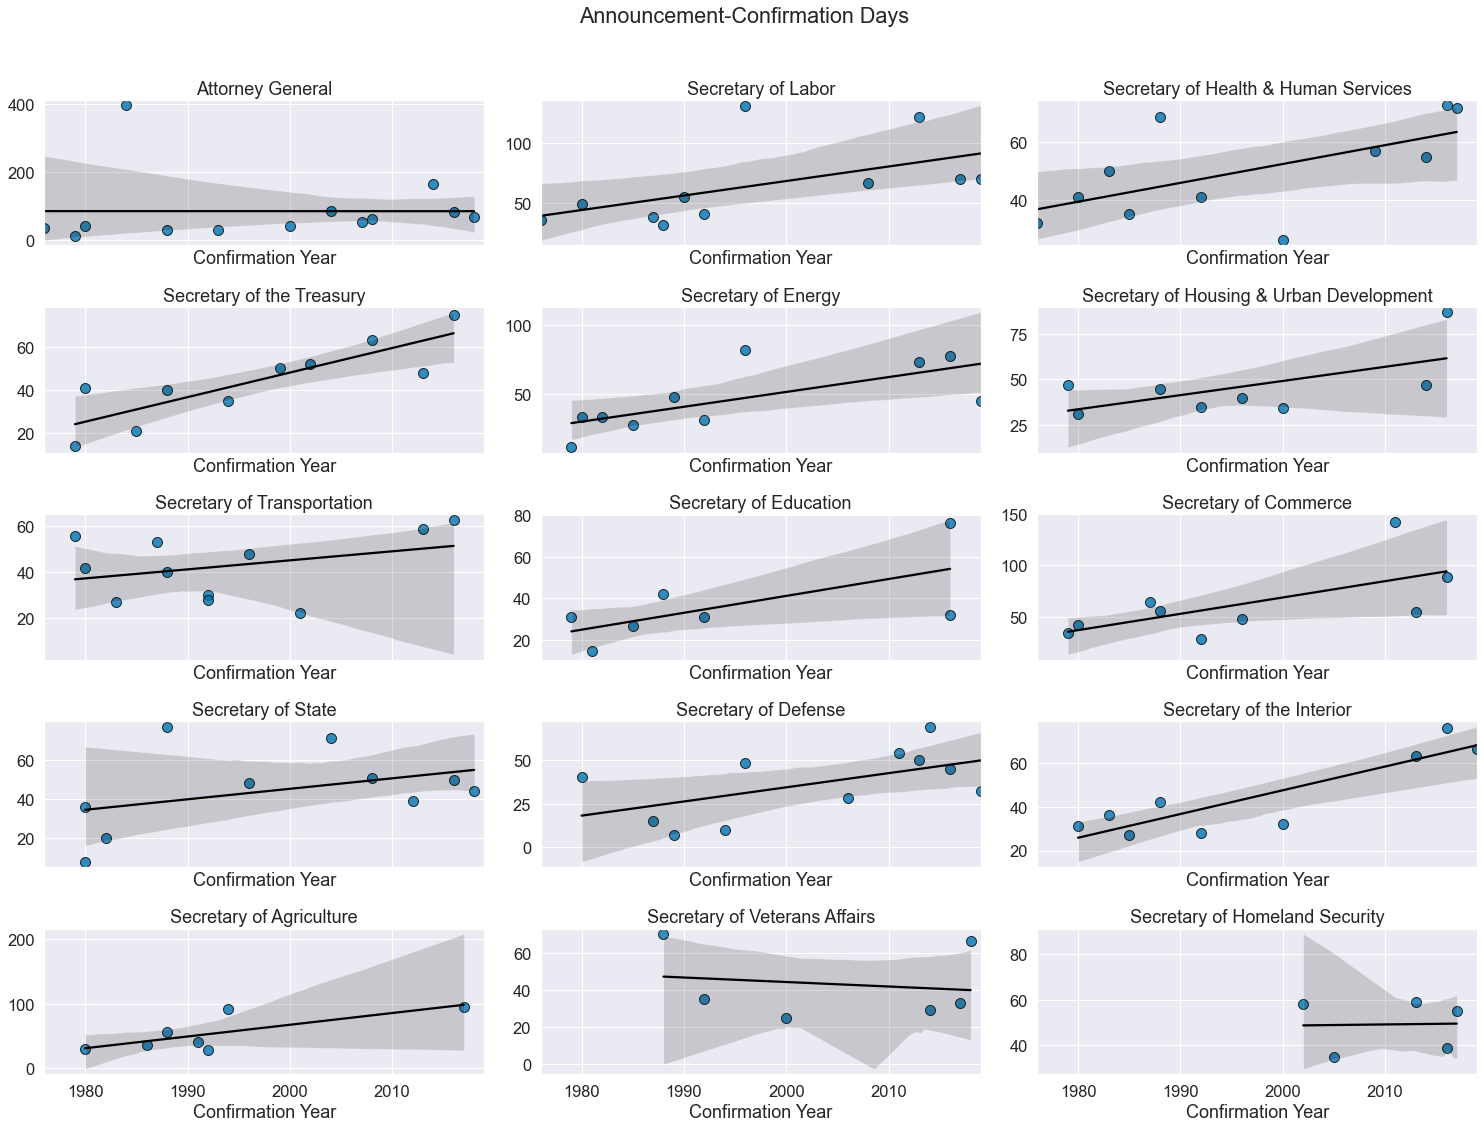

In [58]:
fig, axes = plt.subplots(nrows = 5, ncols = 3, figsize = (10.5 * 2, 7.5 * 2), sharex = True, sharey = False)

axes = axes.flatten()

for i, position_i in enumerate(nominee_announced_confirmed["position"].unique().tolist()):
    # regression plot
    sns.regplot(x = "announced_year", y = "announced_confirmed_days", data = nominee_announced_confirmed.query("position == '{}'".format(position_i)), scatter_kws = {"s": 100, "edgecolor": "black"}, lowess = False, line_kws = {"color": "black"}, ax = axes[i])
    
    axes[i].margins(0.04)
    
    # titles
    axes[i].set(xlabel = "Confirmation Year", ylabel = None, title = position_i)

# big title
fig.suptitle("Announcement-Confirmation Days", y = 1.05)

# tighten
fig.tight_layout()

# Models

## Center confirmation year around minimum year for the position

In [59]:
nominee_announced_confirmed["announced_year_min_c"] = nominee_announced_confirmed.groupby("position")["announced_year"].transform(lambda x: x - x.min())

## Predictor matrix

In [60]:
y, X = patsy.dmatrices("announced_confirmed_days ~ announced_year_min_c * C(position, Sum) + democratic_president + first_pick", data = nominee_announced_confirmed)

## Ridge, Lasso, Elastic Net regression grid search

In [61]:
# estimators
ridge = linear_model.Ridge(fit_intercept = True, max_iter = 1000)
lasso = linear_model.Lasso(fit_intercept = True, max_iter = 1000)
elastic_net = linear_model.ElasticNet(fit_intercept = True, max_iter = 1000)

# alpha parameters
param_grid1 = {"alpha": (10 ** np.linspace(start = 10, stop = -2, num = 10)) / 2}

# grid search
grid_search1 = model_selection.GridSearchCV(estimator = ridge, param_grid = param_grid1, cv = 5, scoring = "neg_mean_squared_error", verbose = 3)
grid_search2 = model_selection.GridSearchCV(estimator = lasso, param_grid = param_grid1, cv = 5, scoring = "neg_mean_squared_error", verbose = 3)
grid_search3 = model_selection.GridSearchCV(estimator = elastic_net, param_grid = param_grid1, cv = 5, scoring = "neg_mean_squared_error", verbose = 3)

### Ridge

In [62]:
# random state
np.random.seed(7352)

# fit
grid_search1.fit(X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] alpha=5000000000.0 ..............................................
[CV] ............... alpha=5000000000.0, score=-663.009, total=   0.0s
[CV] alpha=5000000000.0 ..............................................
[CV] .............. alpha=5000000000.0, score=-4628.690, total=   0.0s
[CV] alpha=5000000000.0 ..............................................
[CV] ............... alpha=5000000000.0, score=-721.861, total=   0.0s
[CV] alpha=5000000000.0 ..............................................
[CV] .............. alpha=5000000000.0, score=-1238.878, total=   0.0s
[CV] alpha=5000000000.0 ..............................................
[CV] ............... alpha=5000000000.0, score=-538.065, total=   0.0s
[CV] alpha=232079441.68063864 ........................................
[CV] ......... alpha=232079441.68063864, score=-662.965, total=   0.0s
[CV] alpha=232079441.68063864 ........................................
[CV] ........ al

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([5.00000000e+09, 2.32079442e+08, 1.07721735e+07, 5.00000000e+05,
       2.32079442e+04, 1.07721735e+03, 5.00000000e+01, 2.32079442e+00,
       1.07721735e-01, 5.00000000e-03])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=3)

### Lasso

In [63]:
# random state
np.random.seed(7352)

# fit
grid_search2.fit(X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] alpha=5000000000.0 ..............................................
[CV] ............... alpha=5000000000.0, score=-663.012, total=   0.0s
[CV] alpha=5000000000.0 ..............................................
[CV] .............. alpha=5000000000.0, score=-4628.690, total=   0.0s
[CV] alpha=5000000000.0 ..............................................
[CV] ............... alpha=5000000000.0, score=-721.861, total=   0.0s
[CV] alpha=5000000000.0 ..............................................
[CV] .............. alpha=5000000000.0, score=-1238.880, total=   0.0s
[CV] alpha=5000000000.0 ..............................................
[CV] ............... alpha=5000000000.0, score=-538.068, total=   0.0s
[CV] alpha=232079441.68063864 ........................................
[CV] ......... alpha=232079441.68063864, score=-663.012, total=   0.0s
[CV] alpha=232079441.68063864 ........................................
[CV] ........ al

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([5.00000000e+09, 2.32079442e+08, 1.07721735e+07, 5.00000000e+05,
       2.32079442e+04, 1.07721735e+03, 5.00000000e+01, 2.32079442e+00,
       1.07721735e-01, 5.00000000e-03])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=3)

### Elastic Net

In [64]:
# random state
np.random.seed(7352)

# fit
grid_search3.fit(X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] alpha=5000000000.0 ..............................................
[CV] ............... alpha=5000000000.0, score=-663.012, total=   0.0s
[CV] alpha=5000000000.0 ..............................................
[CV] .............. alpha=5000000000.0, score=-4628.690, total=   0.0s
[CV] alpha=5000000000.0 ..............................................
[CV] ............... alpha=5000000000.0, score=-721.861, total=   0.0s
[CV] alpha=5000000000.0 ..............................................
[CV] .............. alpha=5000000000.0, score=-1238.880, total=   0.0s
[CV] alpha=5000000000.0 ..............................................
[CV] ............... alpha=5000000000.0, score=-538.068, total=   0.0s
[CV] alpha=232079441.68063864 ........................................
[CV] ......... alpha=232079441.68063864, score=-663.012, total=   0.0s
[CV] alpha=232079441.68063864 ........................................
[CV] ........ al

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([5.00000000e+09, 2.32079442e+08, 1.07721735e+07, 5.00000000e+05,
       2.32079442e+04, 1.07721735e+03, 5.00000000e+01, 2.32079442e+00,
       1.07721735e-01, 5.00000000e-03])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=3)

## Best parameters

In [65]:
grid_search1.best_params_, grid_search2.best_params_, grid_search3.best_params_

({'alpha': 1077.2173450159432},
 {'alpha': 2.320794416806396},
 {'alpha': 2.320794416806396})

## Best CV RMSE

In [66]:
np.sqrt(grid_search1.best_score_ * -1), np.sqrt(grid_search2.best_score_ * -1), np.sqrt(grid_search3.best_score_ * -1)

(36.87561585214549, 37.16347904865173, 37.15503564163976)

## Add predictions to data frame

In [67]:
nominee_announced_confirmed["announced_confirmed_days_predicted"] = grid_search1.predict(X)

## RMSE per position

In [68]:
nominee_announced_confirmed["error"] = nominee_announced_confirmed["announced_confirmed_days"] - nominee_announced_confirmed["announced_confirmed_days_predicted"]

nominee_announced_confirmed["squared_error"] = nominee_announced_confirmed["error"] ** 2

nominee_announced_confirmed.groupby("position")["squared_error"].mean().apply(np.sqrt).sort_values()

position
Secretary of the Interior                    11.078067
Secretary of the Treasury                    11.930542
Secretary of Homeland Security               12.202513
Secretary of Health & Human Services         12.464341
Secretary of Transportation                  12.894436
Secretary of Housing & Urban Development     13.411330
Secretary of Education                       16.257553
Secretary of Energy                          17.392266
Secretary of State                           18.244070
Secretary of Defense                         18.429225
Secretary of Agriculture                     18.567292
Secretary of Veterans Affairs                18.971042
Secretary of Commerce                        25.282874
Secretary of Labor                           26.999690
Attorney General                            100.895751
Name: squared_error, dtype: float64

## Mean error per position

In [69]:
nominee_announced_confirmed.groupby("position")["error"].describe().sort_values("mean")

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
Secretary of Education,7.0,-7.650622,15.494258,-23.019288,-17.553469,-11.984758,-2.698686,21.954004
Secretary of Defense,11.0,-6.341148,18.148521,-32.391788,-19.693944,-0.738786,5.955253,23.672522
Secretary of the Interior,9.0,-4.682499,10.648826,-19.049429,-13.738672,-3.345136,1.571217,13.802283
Secretary of the Treasury,10.0,-4.210182,11.766818,-22.597117,-11.422463,-1.261298,2.898087,13.976564
Secretary of Energy,10.0,-3.627049,17.929970,-26.188788,-15.871666,-5.749116,7.749539,31.557897
Secretary of Housing & Urban Development,8.0,-2.055236,14.167963,-16.590901,-10.953051,-7.438121,4.020585,26.159215
Secretary of State,10.0,-1.832191,19.133716,-29.205450,-13.432290,-2.979807,2.244804,35.933318
Secretary of Transportation,11.0,-1.198508,13.465254,-25.176644,-12.659141,3.034928,7.630458,18.789780
Secretary of Health & Human Services,11.0,-0.361991,13.067197,-26.783741,-6.736908,-1.715850,8.075497,24.033382


## Mean absolute error per position

In [70]:
nominee_announced_confirmed.groupby("position")["error"].apply(lambda x: np.abs(x).mean()).sort_values()

position
Secretary of the Interior                    8.726237
Secretary of the Treasury                    9.289682
Secretary of Health & Human Services         9.675191
Secretary of Homeland Security              10.717585
Secretary of Transportation                 10.936225
Secretary of Housing & Urban Development    11.567369
Secretary of State                          14.027589
Secretary of Education                      14.104511
Secretary of Energy                         14.823433
Secretary of Defense                        15.048052
Secretary of Agriculture                    15.406329
Secretary of Veterans Affairs               16.837525
Secretary of Commerce                       17.726133
Secretary of Labor                          19.158451
Attorney General                            49.268809
Name: error, dtype: float64

In [80]:
(nominee_announced_confirmed.groupby("position").agg(mean_error = ("error", np.mean))
 .join(nominee_announced_confirmed.groupby("position").agg(root_mean_squared_error = ("squared_error", lambda x: np.sqrt(np.mean(x)))))
 .join(nominee_announced_confirmed.groupby("position").agg(mean_absolute_error = ("error", lambda x: np.mean(np.abs(x)))))
 .sort_values("root_mean_squared_error")
 .reset_index()
).to_csv("model_errors_by_position.csv")

## Best estimator $R^2$

In [72]:
metrics.r2_score(y_true = y, y_pred = grid_search1.best_estimator_.predict(X)), metrics.r2_score(y_true = y, y_pred = grid_search2.best_estimator_.predict(X)), metrics.r2_score(y_true = y, y_pred = grid_search3.best_estimator_.predict(X))

(0.16442912657276076, 0.16485171091135653, 0.1666748298461289)

## Compare to OLS

In [73]:
sm.OLS.from_formula("announced_confirmed_days ~ announced_year_min_c * C(position, Sum) + democratic_president + first_pick", data = nominee_announced_confirmed).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     announced_confirmed_days   R-squared:                       0.238
Model:                                  OLS   Adj. R-squared:                  0.015
Method:                       Least Squares   F-statistic:                     1.067
Date:                      Sat, 30 Jan 2021   Prob (F-statistic):              0.391
Time:                              15:30:34   Log-Likelihood:                -680.85
No. Observations:                       138   AIC:                             1426.
Df Residuals:                           106   BIC:                             1519.
Df Model:                                31                                         
Covariance Type:                  nonrobust                                         
=====================================================================================================================================================
                                                                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                            36.1165      5.683      6.355      0.000      24.849      47.384
C(position, Sum)[S.Attorney General]                                                 48.5560     18.691      2.598      0.011      11.500      85.612
C(position, Sum)[S.Secretary of Agriculture]                                         -6.4259     21.412     -0.300      0.765     -48.877      36.025
C(position, Sum)[S.Secretary of Commerce]                                            -1.1094     19.865     -0.056      0.956     -40.493      38.274
C(position, Sum)[S.Secretary of Defense]                                            -20.7378     22.319     -0.929      0.355     -64.987      23.511
C(position, Sum)[S.Secretary of Education]                                          -11.4424     20.087     -0.570      0.570     -51.266      28.382
C(position, Sum)[S.Secretary of Energy]                                              -8.4882     17.720     -0.479      0.633     -43.620      26.644
C(position, Sum)[S.Secretary of Health & Human Services]                              1.5258     19.286      0.079      0.937     -36.711      39.762
C(position, Sum)[S.Secretary of Homeland Security]                                   10.8662     28.452      0.382      0.703     -45.543      67.275
C(position, Sum)[S.Secretary of Housing & Urban Development]                         -2.1979     21.237     -0.103      0.918     -44.302      39.906
C(position, Sum)[S.Secretary of Labor]                                                5.2959     20.003      0.265      0.792     -34.363      44.954
C(position, Sum)[S.Secretary of State]                                               -2.8074     19.202     -0.146      0.884     -40.878      35.263
C(position, Sum)[S.Secretary of Transportation]                                      -1.2339     17.922     -0.069      0.945     -36.766      34.298
C(position, Sum)[S.Secretary of Veterans Affairs]                                    14.5895     25.910      0.563      0.575     -36.780      65.959
C(position, Sum)[S.Secretary of the Interior]                                       -11.1470     19.568     -0.570      0.570     -49.943      27.649
announced_year_min_c                                                                  0.7619      0.310      2.461      0.015       0.148       1.376
announced_year_min_c:C(position, Sum)[S.Attorney General]                            -0.8188      0.757     -1.082      0.282      -2.319       0.682
announced_year_mi

## Plot errors per position

/Users/nicholasmichalak/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/nicholasmichalak/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/nicholasmichalak/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNu

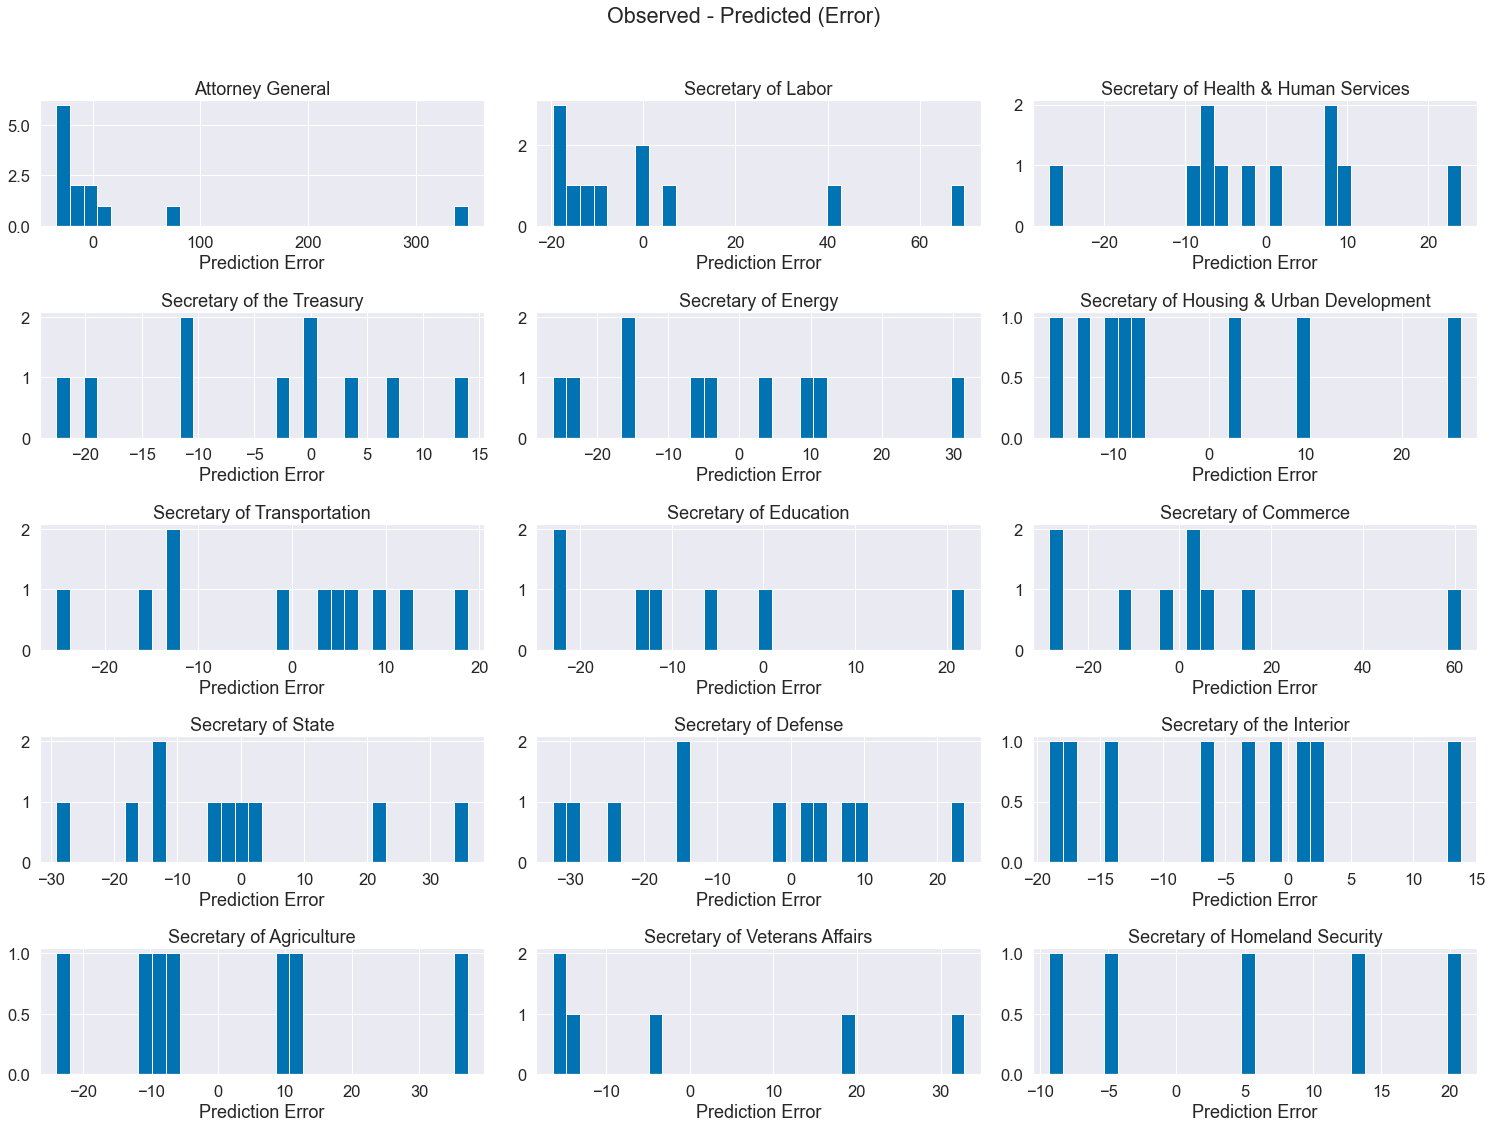

In [74]:
fig, axes = plt.subplots(nrows = 5, ncols = 3, figsize = (10.5 * 2, 7.5 * 2), sharex = False, sharey = False)

axes = axes.flatten()

for i, position_i in enumerate(nominee_announced_confirmed["position"].unique().tolist()):
    # histogram
    nominee_announced_confirmed.query("position == '{}'".format(position_i))["error"].plot(kind = "hist", bins = 30, ax = axes[i])
    
    axes[i].margins(0.04)
    
    # titles
    axes[i].set(xlabel = "Prediction Error", ylabel = None, title = position_i)

# big title
fig.suptitle("Observed - Predicted (Error)", y = 1.05)

# tighten
fig.tight_layout()

# Make predictions for Biden cabinet members

## Center confirmation year around minimum year for the position

In [75]:
biden_cabinet_nominations = biden_cabinet_nominations.merge(nominee_announced_confirmed.groupby("position")["announced_year"].min().reset_index(name = "position_year1"), how = "left", on = "position")

biden_cabinet_nominations["announced_year_min_c"] = biden_cabinet_nominations["announced_year"] - biden_cabinet_nominations["position_year1"]

# also first pick variable and president party
biden_cabinet_nominations["first_pick"] = 0.5
biden_cabinet_nominations["democratic_president"] = 0.5

# see it
biden_cabinet_nominations

,position,president,nominee,announced_date,announced_datetime,announced_year,position_year1,announced_year_min_c,first_pick,democratic_president
0,Secretary of Homeland Security,Joseph R. Biden,Alejandro Mayorkas,11/23/20,2020-11-23,2020,2002,18,0.5,0.5
1,Secretary of State,Joseph R. Biden,Antony Blinken,11/23/20,2020-11-23,2020,1980,40,0.5,0.5
2,Secretary of the Interior,Joseph R. Biden,Deb Haaland,12/17/20,2020-12-17,2020,1980,40,0.5,0.5
3,Secretary of Veterans Affairs,Joseph R. Biden,Denis McDonough,12/10/20,2020-12-10,2020,1988,32,0.5,0.5
4,Secretary of Defense,Joseph R. Biden,Gen. Lloyd Austin,12/8/20,2020-12-08,2020,1980,40,0.5,0.5
5,Secretary of Commerce,Joseph R. Biden,Gina Raimondo,1/7/21,2021-01-07,2021,1979,42,0.5,0.5
6,Secretary of the Treasury,Joseph R. Biden,Janet Yellen,11/30/20,2020-11-30,2020,1979,41,0.5,0.5
7,Secretary of Energy,Joseph R. Biden,Jennifer Granholm,12/17/20,2020-12-17,2020,1979,41,0.5,0.5
8,Secretary of Housing & Urban Development,Joseph R. Biden,Marcia Fudge,12/10/20,2020-12-10,2020,1979,41,0.5,0.5
9,Secretary of Labor,Joseph R. Biden,Marty Walsh,1/7/21,2021-01-07,2021,1976,45,0.5,0.5


## Predictor matrix

In [76]:
X_biden = patsy.dmatrix("announced_year_min_c * C(position, Sum) + democratic_president + first_pick", data = biden_cabinet_nominations)

## Add predictions to Biden data frame

In [77]:
# days
biden_cabinet_nominations["announced_confirmed_days_predicted"] = grid_search1.predict(X_biden)

# add days to annoncement date
biden_cabinet_nominations["confirmed_datetime_predicted"] = biden_cabinet_nominations["announced_datetime"] + biden_cabinet_nominations["announced_confirmed_days_predicted"].apply(lambda x: pd.DateOffset(n = int(round(x))))

# see it
biden_cabinet_nominations.sort_values("confirmed_datetime_predicted")

/Users/nicholasmichalak/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimelike.py:1215: PerformanceWarning: Adding/subtracting array of DateOffsets to DatetimeArray not vectorized
  PerformanceWarning,


,position,president,nominee,announced_date,announced_datetime,announced_year,position_year1,announced_year_min_c,first_pick,democratic_president,announced_confirmed_days_predicted,confirmed_datetime_predicted
0,Secretary of Homeland Security,Joseph R. Biden,Alejandro Mayorkas,11/23/20,2020-11-23,2020,2002,18,0.5,0.5,51.437229,2021-01-13
1,Secretary of State,Joseph R. Biden,Antony Blinken,11/23/20,2020-11-23,2020,1980,40,0.5,0.5,56.717185,2021-01-19
4,Secretary of Defense,Joseph R. Biden,Gen. Lloyd Austin,12/8/20,2020-12-08,2020,1980,40,0.5,0.5,46.628440,2021-01-24
3,Secretary of Veterans Affairs,Joseph R. Biden,Denis McDonough,12/10/20,2020-12-10,2020,1988,32,0.5,0.5,47.118446,2021-01-26
6,Secretary of the Treasury,Joseph R. Biden,Janet Yellen,11/30/20,2020-11-30,2020,1979,41,0.5,0.5,63.600112,2021-02-02
12,Secretary of Transportation,Joseph R. Biden,Pete Buttigieg,12/15/20,2020-12-15,2020,1979,41,0.5,0.5,55.772336,2021-02-09
8,Secretary of Housing & Urban Development,Joseph R. Biden,Marcia Fudge,12/10/20,2020-12-10,2020,1979,41,0.5,0.5,63.331760,2021-02-11
14,Secretary of Health & Human Services,Joseph R. Biden,Xavier Becerra,12/7/20,2020-12-07,2020,1976,44,0.5,0.5,65.740784,2021-02-11
11,Secretary of Education,Joseph R. Biden,Miguel Cardona,12/22/20,2020-12-22,2020,1979,41,0.5,0.5,55.806125,2021-02-16
2,Secretary of the Interior,Joseph R. Biden,Deb Haaland,12/17/20,2020-12-17,2020,1980,40,0.5,0.5,64.913293,2021-02-20


## Export predictions

In [78]:
biden_cabinet_nominations.loc[:, ["position", "nominee", "announced_datetime", "announced_year", "announced_confirmed_days_predicted", "confirmed_datetime_predicted"]].sort_values("announced_datetime").to_csv("202101_biden_cabinet_confirmation_predictions.csv", index = False)